In [1]:
# import Python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature

**Open and display the OA Flux dataset using xarray (sample code provided below for you to modify):**

```
# open dataset using xarray (oaflux.nc)
filePath = 'paste your filepath here'
ds = xr.open_dataset(filePath)

# display dataset
ds
```

In [2]:
#---ANSWER KEY---
ds = xr.open_dataset('/Users/alawman2023/Documents/Data/EV353_Datasets/oaflux.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 26, lat: 180, lon: 360)
Coordinates:
  * time     (time) float64 1.984e+03 1.985e+03 ... 2.008e+03 2.009e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    qlh      (lat, lon, time) float32 ...
    qlw      (lat, lon, time) float32 ...
    qsh      (lat, lon, time) float32 ...
    qsw      (lat, lon, time) float32 ...
Attributes:
    description:  oaflux

**Dataset variables and coordinates:**
- lat: latitude vector
- lon:    longitude vector (0-360 format)
- time   time vector (1984-2009)
- qsw    net downward shortwave radiation (W/m$^2$) (time x lon x lat)
- qlw    net upward longwave radiation (W/m$^2$) (time x lon x lat)
- qsh    net upward sensible heat flux (W/m$^2$) (time x lon x lat)
- qlh    net upward latent heat flux (W/m$^2$) (time x lon x lat)

**Instructions:**

1. Define variables for all 4 heat flux terms and calculate the time-mean net heat flux as a variable called `qnet`

2. Plot a global map of q_net. Some code is provided below to help get you started. 

3. Then for two different locations in the world ocean, estimate the rate of change of SST ($\partial T$/$\partial t$) in degrees C per week that would occur perpetually if net surface heat flux constituted the entire ocean mixed layer heat budget (i.e., no advection or mixing). For locations within the topics, assume a mixed layer depth h of 30 m. Otherwise use h = 80 m. Assume a constant mixed layer seawater density of 1025 kg/m$^3$

**Sample map code:**
```
# map projection, colormap using cmocean, and levels for the colorbar
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.balance
lev = np.arange(-150, 160, 10)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of DataArray
#...add your code here...
```

In [3]:
#---ANSWER KEY---
qlh = ds['qlh']
qlw = ds['qlw']
qsh = ds['qsh']
qsw = ds['qsw']

qnet = qsw - qlw - qsh - qlh
qnet = qnet.mean(dim='time')
qnet

<xarray.DataArray (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

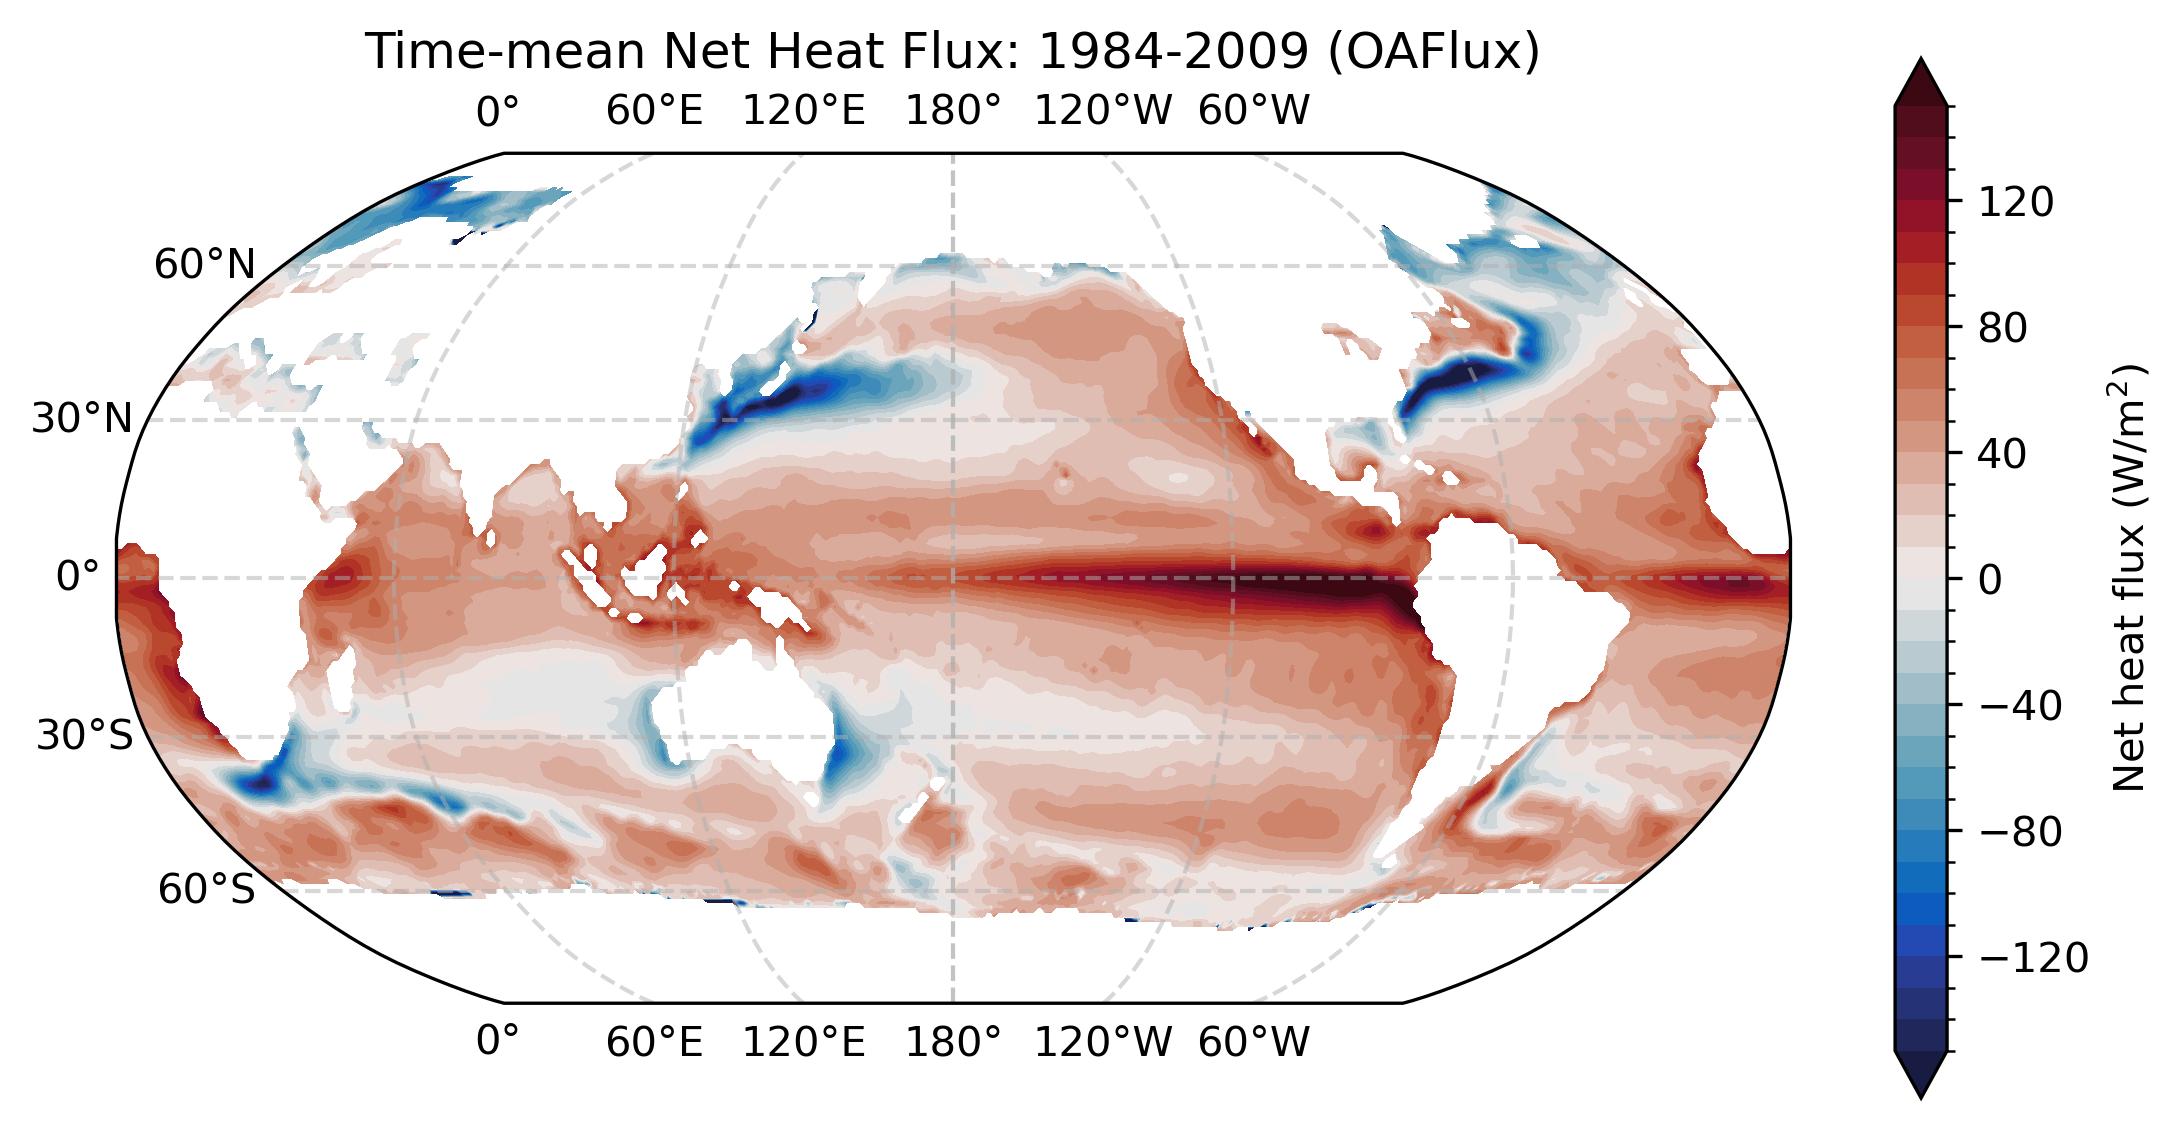

In [4]:
#---ANSWER KEY---

# map projection, colormap using cmocean, and levels for the colorbar
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.balance
lev = np.arange(-150, 160, 10)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of DataArray
qnet.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True,
    cbar_kwargs = {"label":"Net heat flux (W/m$^2$)"})

#CS = qnet.plot.contour(x ='lon', y ='lat', colors ='k', levels = lev, linewidths=1)
#ax.clabel(CS, fontsize = 8, levels = CS.levels[::1]) # labels every 4th contour otherwise the plot is too busy

#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='k', facecolor='lightgray'))

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title('Time-mean Net Heat Flux: 1984-2009 (OAFlux)')

fig.savefig("oaflux_Q_net.png", facecolor = 'white', transparent = False, bbox_inches ='tight')

In [5]:
#---ANSWER KEY---
qnet_equator = 140
qnet_westernboundary = -140
Cp = 3850
rho = 1025

h_equator = 30
h_extratropic = 80

dT_dt_equator = (qnet_equator/(rho*Cp*h_equator))*(60*60*24*7)
print(dT_dt_equator)

dT_dt_westernboundary = (qnet_westernboundary/(rho*Cp*h_extratropic))*(60*60*24*7)
print(dT_dt_westernboundary)

0.7152106430155211
-0.2682039911308204
